In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df=pd.read_csv('PERSIANN_200301_202204  allur m.csv')

In [3]:
df.head()

,time,Rain
0,2003-01-01,2.57
1,2003-02-01,0.00
2,2003-03-01,27.05
3,2003-04-01,23.30
4,2003-05-01,142.93


In [4]:
df.tail()

,time,Rain
227,2021-12-01,0.00
228,2022-01-01,0.00
229,2022-02-01,0.00
230,2022-03-01,0.00
231,2022-04-01,1.59


In [5]:
df.columns=["time","Rain"]
df.head()

,time,Rain
0,2003-01-01,2.57
1,2003-02-01,0.00
2,2003-03-01,27.05
3,2003-04-01,23.30
4,2003-05-01,142.93


In [6]:
df['time']=pd.to_datetime(df['time'])

In [7]:
df.set_index('time',inplace=True)

In [8]:
df.head()

,Rain
time,
2003-01-01,2.57
2003-02-01,0.00
2003-03-01,27.05
2003-04-01,23.30
2003-05-01,142.93


In [9]:
df.describe()

,Rain
count,232.000000
mean,124.961379
std,141.780850
min,0.000000
25%,2.290000
50%,87.680000
75%,202.745000
max,680.150000


<AxesSubplot:xlabel='time'>

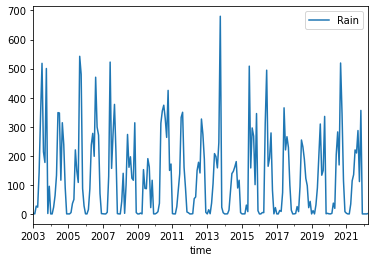

In [10]:
df.plot()

In [11]:
from statsmodels.tsa.stattools import adfuller

In [12]:
test_result=adfuller(df['Rain'])

In [13]:
def adfuller_test(Rain):
    result=adfuller(Rain)
    labels = ['ADF Test Statistic','p-value','#Lags Used','Number of Observations Used']
    for value,label in zip(result,labels):
        print(label+' : '+str(value) )
    if result[1] <= 0.05:
        print("strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary")
    else:
        print("weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary ")

In [14]:
adfuller_test(df['Rain'])

ADF Test Statistic : -3.4870998291034203
p-value : 0.008324644813110025
#Lags Used : 11
Number of Observations Used : 220
strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary


In [15]:
df['Sales First Difference'] = df['Rain'] - df['Rain'].shift(1)

In [16]:
df['Rain'].shift(1)

time
2003-01-01       NaN
2003-02-01      2.57
2003-03-01      0.00
2003-04-01     27.05
2003-05-01     23.30
               ...  
2021-12-01    356.13
2022-01-01      0.00
2022-02-01      0.00
2022-03-01      0.00
2022-04-01      0.00
Name: Rain, Length: 232, dtype: float64

In [17]:
df['Seasonal First Difference']=df['Rain']-df['Rain'].shift(12)

In [18]:
df.head(14)

,Rain,Sales First Difference,Seasonal First Difference
time,,,
2003-01-01,2.57,NaN,NaN
2003-02-01,0.00,-2.57,NaN
2003-03-01,27.05,27.05,NaN
2003-04-01,23.30,-3.75,NaN
2003-05-01,142.93,119.63,NaN
2003-06-01,340.36,197.43,NaN
2003-07-01,518.15,177.79,NaN
2003-08-01,213.56,-304.59,NaN
2003-09-01,177.09,-36.47,NaN


In [19]:
adfuller_test(df['Seasonal First Difference'].dropna())

ADF Test Statistic : -6.4267553249419604
p-value : 1.7368908665591286e-08
#Lags Used : 11
Number of Observations Used : 208
strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary


<AxesSubplot:xlabel='time'>

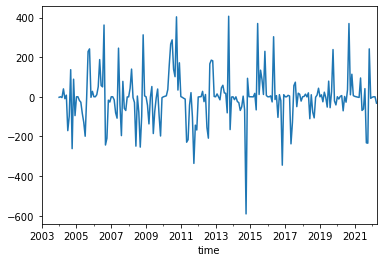

In [20]:
df['Seasonal First Difference'].plot()

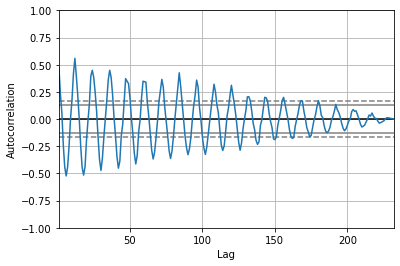

In [21]:
from pandas.plotting import autocorrelation_plot
autocorrelation_plot(df['Rain'])
plt.show()

In [22]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

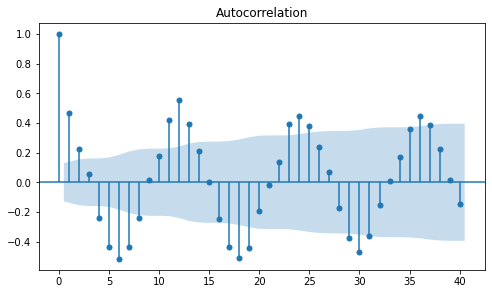

In [23]:
fig = plt.figure(figsize=(8,10))
ax1 = fig.add_subplot(211)
fig = plot_acf(df['Rain'].iloc[1:],lags=40,ax=ax1)

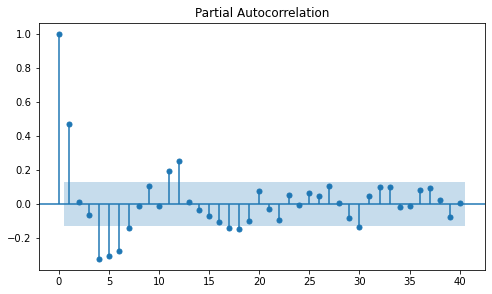

In [24]:
fig = plt.figure(figsize=(8,10))
ax2 = fig.add_subplot(211)
fig = plot_pacf(df['Rain'].iloc[1:],lags=40,ax=ax2)

In [25]:
from statsmodels.tsa.arima_model import ARIMA

In [26]:
model=ARIMA(df['Rain'],order=(1,1,0))
model_fit=model.fit()

C:\Users\IJ1327\anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
C:\Users\IJ1327\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS 

In [27]:
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:                 D.Rain   No. Observations:                  231
Model:                 ARIMA(1, 1, 0)   Log Likelihood               -1469.084
Method:                       css-mle   S.D. of innovations            139.849
Date:                Wed, 18 May 2022   AIC                           2944.167
Time:                        14:06:29   BIC                           2954.494
Sample:                    02-01-2003   HQIC                          2948.333
                         - 04-01-2022                                         
================================================================================
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
const           -0.0027      7.242     -0.000      1.000     -14.198      14.192
ar.L1.D.Rain    -0.2717      0.063     -4.302      0.000      -0.395      -0.148
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1           -3.6812           +0.0000j            3.6812            0.5000
-----------------------------------------------------------------------------
"""

<AxesSubplot:xlabel='time'>

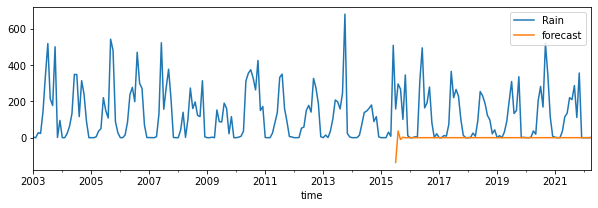

In [28]:
df['forecast']=model_fit.predict(start=150,end=231,dynamic=True)
df[['Rain','forecast']].plot(figsize=(10,3))

In [29]:
import statsmodels.api as sm

In [30]:
model=sm.tsa.statespace.SARIMAX(df['Rain'],order=(1, 1, 1),seasonal_order=(1,1,1,12))
results=model.fit()

C:\Users\IJ1327\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\IJ1327\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


<AxesSubplot:xlabel='time'>

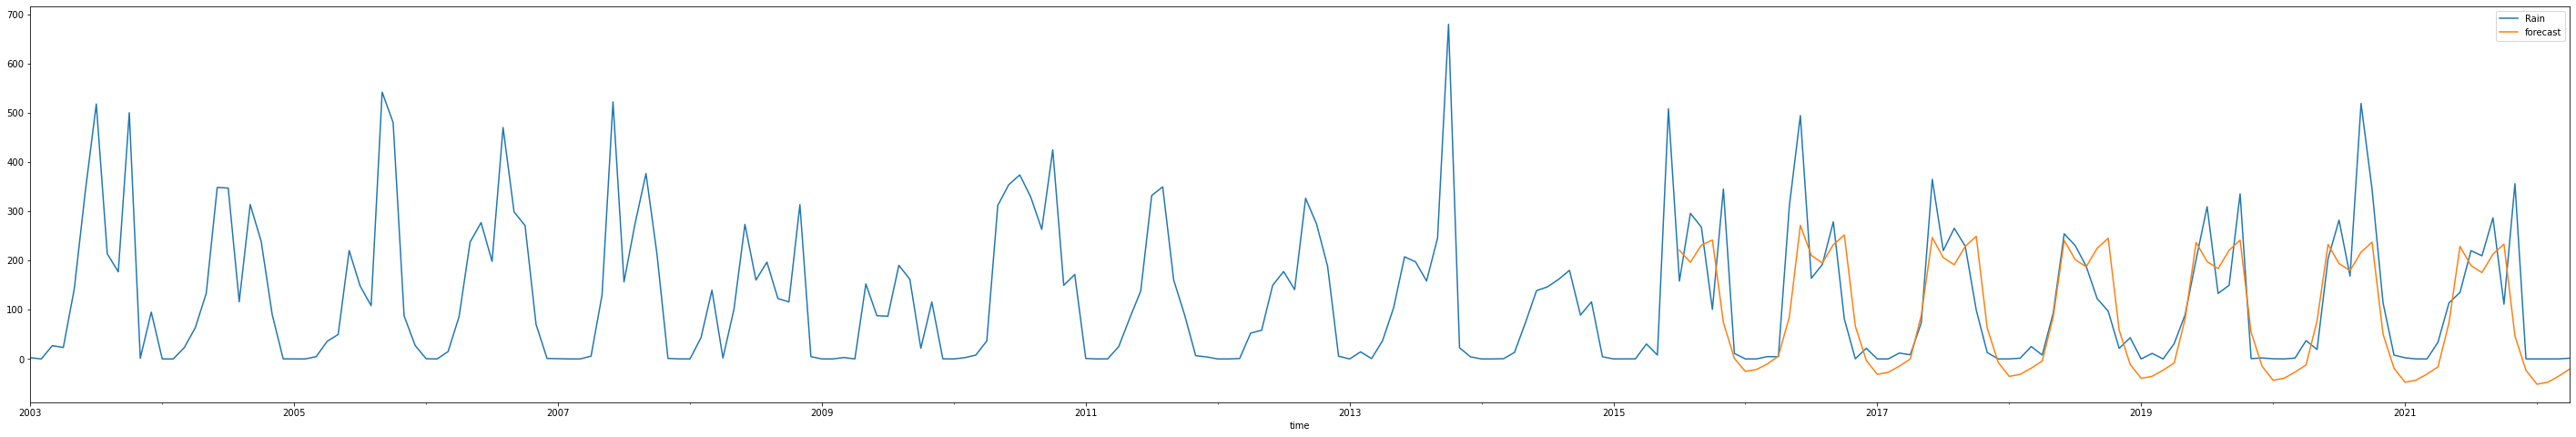

In [31]:
df['forecast']=results.predict(start=150,end=231,dynamic=True)
df[['Rain','forecast']].plot(figsize=(50,8))

In [32]:
from pandas.tseries.offsets import DateOffset
future_dates=[df.index[-1]+ DateOffset(months=x)for x in range(0,60)]

In [33]:
future_datest_df=pd.DataFrame(index=future_dates[1:],columns=df.columns)

In [34]:
future_datest_df.tail()

,Rain,Sales First Difference,Seasonal First Difference,forecast
2026-11-01,NaN,NaN,NaN,NaN
2026-12-01,NaN,NaN,NaN,NaN
2027-01-01,NaN,NaN,NaN,NaN
2027-02-01,NaN,NaN,NaN,NaN
2027-03-01,NaN,NaN,NaN,NaN


In [35]:
future_df=pd.concat([df,future_datest_df])

<AxesSubplot:>

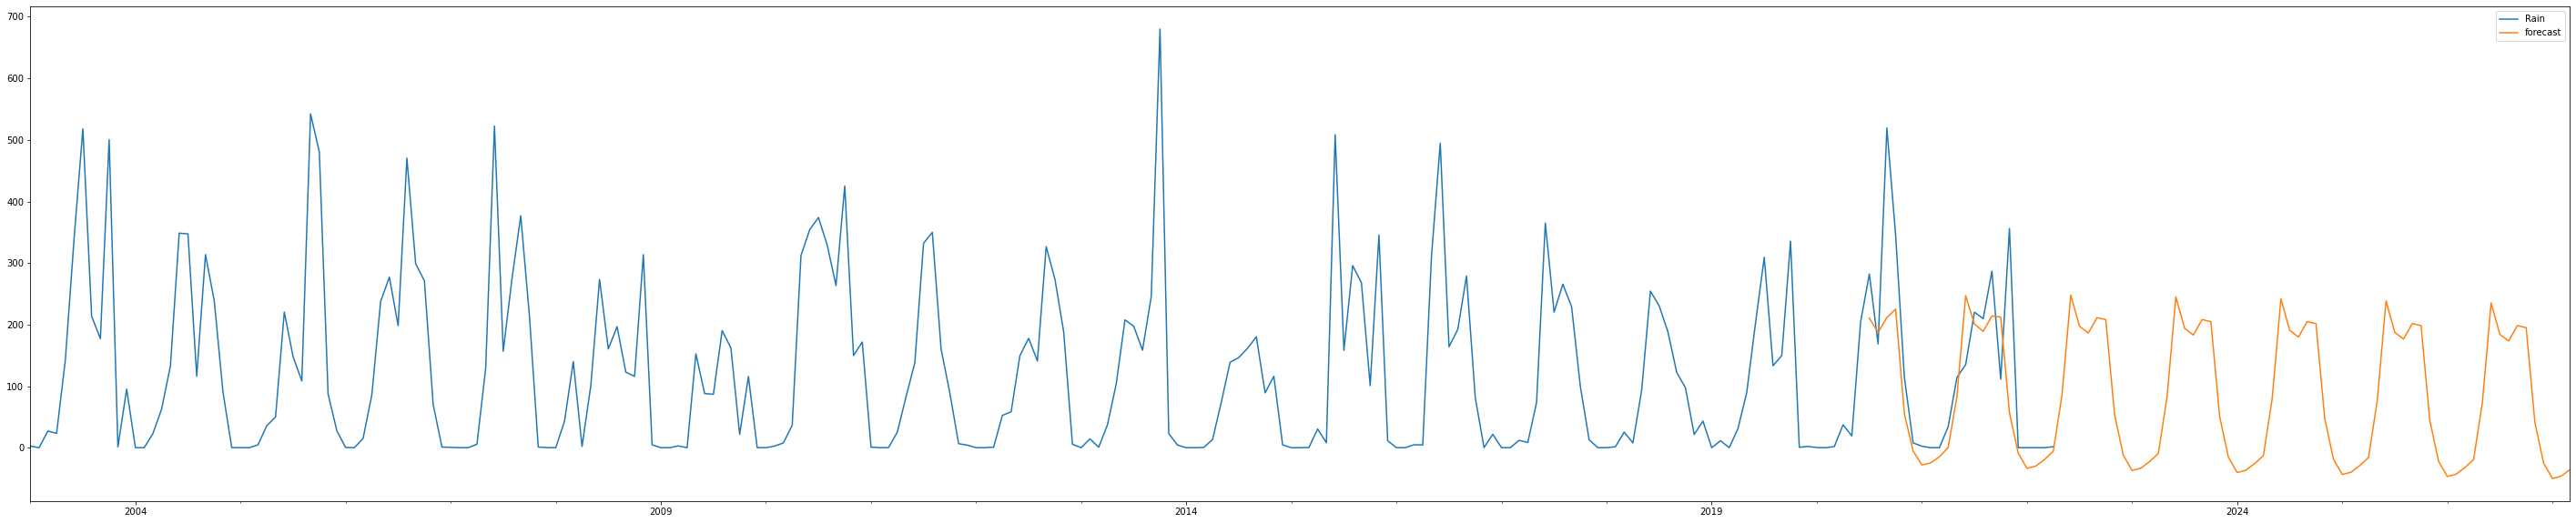

In [36]:
future_df['forecast'] = results.predict(start = 210, end = 291, dynamic= True)  
future_df[['Rain','forecast']].plot(figsize=(50,10))

In [37]:
future_df['forecast'].tail(60)

2022-04-01     -5.963572
2022-05-01     85.540499
2022-06-01    247.861576
2022-07-01    197.163539
2022-08-01    186.259087
2022-09-01    211.306126
2022-10-01    208.128143
2022-11-01     54.026481
2022-12-01    -12.190609
2023-01-01    -37.058884
2023-02-01    -33.342652
2023-03-01    -22.573249
2023-04-01     -9.485127
2023-05-01     82.831103
2023-06-01    244.985312
2023-07-01    193.862839
2023-08-01    183.051678
2023-09-01    208.103567
2023-10-01    204.800422
2023-11-01     50.818432
2023-12-01    -15.443434
2024-01-01    -40.327018
2024-02-01    -36.608122
2024-03-01    -25.832802
2024-04-01    -12.759409
2024-05-01     79.629842
2024-06-01    241.769047
2024-07-01    190.608414
2024-08-01    179.805641
2024-09-01    204.857966
2024-10-01    201.543568
2024-11-01     47.572338
2024-12-01    -18.693555
2025-01-01    -43.578515
2025-02-01    -39.859379
2025-03-01    -29.083527
2025-04-01    -16.011458
2025-05-01     76.384357
2025-06-01    238.522214
2025-07-01    187.358150
